In [315]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud

nltk.download('inaugural')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import inaugural
inaugural.fileids()

from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\v2n\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\v2n\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\v2n\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v2n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [316]:
roo=inaugural.raw('1941-Roosevelt.txt')


In [317]:
ken=inaugural.raw('1961-Kennedy.txt')


In [318]:
nix=inaugural.raw('1973-Nixon.txt')

In [319]:
speech=[roo,ken,nix]

ROOSEVELT 



The total number of characters in the speech EXCLUDING spaces and punctuations is :  5925 

The total number of characters in the speech INCLUDING spaces and punctuations is :  10822 

The total number of words in the speech is :  1315 

The total number of sentences in the speech is :  68 

The three most frequent words and their occurences are : 
  [('nation', 12), ('know', 10), ('spirit', 9)] 






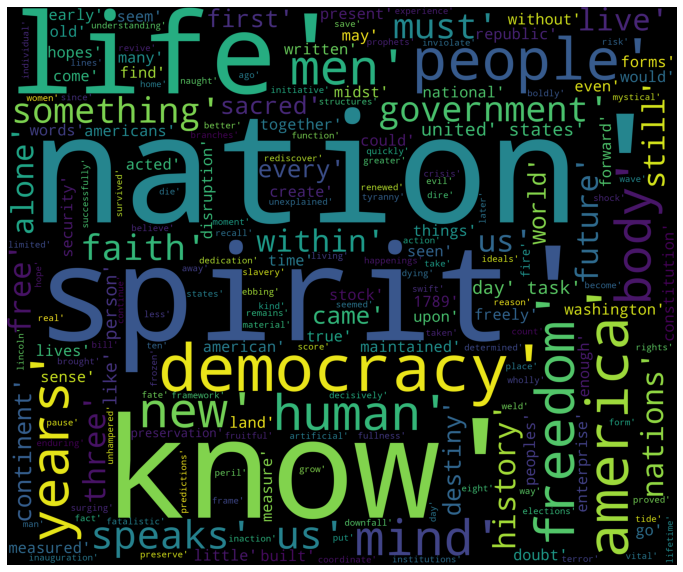

KENNEDY 



The total number of characters in the speech EXCLUDING spaces and punctuations is :  5961 

The total number of characters in the speech INCLUDING spaces and punctuations is :  10887 

The total number of words in the speech is :  1337 

The total number of sentences in the speech is :  52 

The three most frequent words and their occurences are : 
  [('let', 16), ('us', 12), ('world', 8)] 






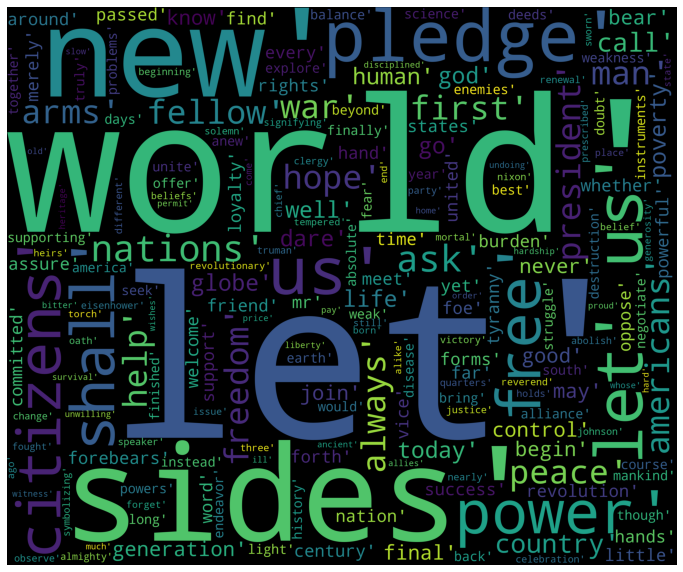

NIXON 



The total number of characters in the speech EXCLUDING spaces and punctuations is :  7834 

The total number of characters in the speech INCLUDING spaces and punctuations is :  14210 

The total number of words in the speech is :  1759 

The total number of sentences in the speech is :  68 

The three most frequent words and their occurences are : 
  [('us', 26), ('let', 22), ('america', 21)] 






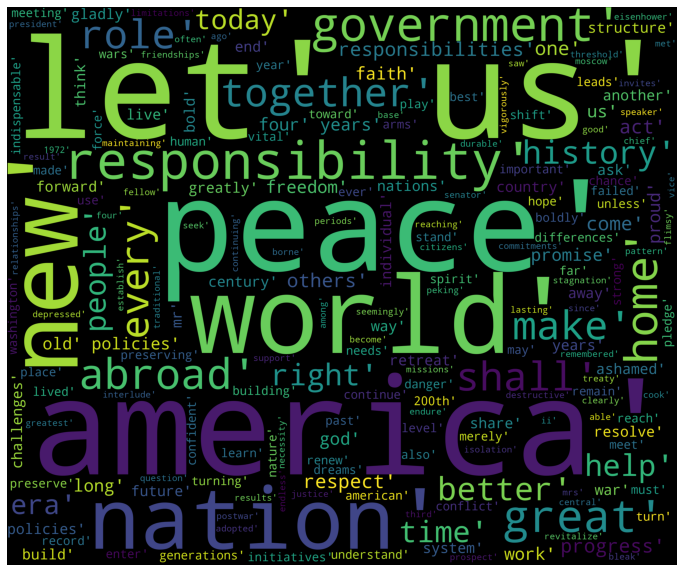

In [371]:
for president in speech:
    if president==roo:
      print("ROOSEVELT","\n")
    if president==nix:
      print("NIXON","\n")
    if president==ken:
      print("KENNEDY","\n")
    tok_sentence=nltk.sent_tokenize(president)
    wordcount=0
    words=[]
    words_raw=[]
    char=[]
    spaces=0
    sentence_count=0
    para_without_sw=[]
    stop = stopwords.words('english')

    for sentence in tok_sentence:
        sentence_count=sentence_count+1
        tokenized_text = nltk.word_tokenize(sentence)
        words_raw.append(str(tokenized_text).split())
        sentence_without_sw = [word for word in tokenized_text if not word in stopwords.words()]
        para_without_sw.append(sentence_without_sw)

        tokenized_text=re.sub(r'\W', ' ', str(tokenized_text))
        tokenized_text=re.sub(r'\s+[a-zA-Z]\s+', ' ', str(tokenized_text))
        tokenized_text=re.sub(r'\^[a-zA-Z]\s+', ' ', str(tokenized_text))
        tokenized_text=re.sub(r'\s+' , ' ', str(tokenized_text))
        tokenized_text=re.sub(r'^b\s+' , ' ', str(tokenized_text))

        spaces_in_sentence=tokenized_text.count(" ")
        spaces=spaces+spaces_in_sentence

        words.append(tokenized_text.split())

    words_separate = [item.lower() for sublist in words for item in sublist]
    words_separate_raw = [item.lower() for sublist in words_raw for item in sublist]
    char= [item.lower() for sublist in words_separate for item in sublist]
    char_raw= [item.lower() for sublist in words_separate_raw for item in sublist]
    print("\n")
    print("The total number of characters in the speech EXCLUDING spaces and punctuations is : ",len(char),"\n")
    print("The total number of characters in the speech INCLUDING spaces and punctuations is : ",len(char_raw),"\n")
    print("The total number of words in the speech is : ",len(words_separate),"\n")
    print("The total number of sentences in the speech is : ",sentence_count,"\n")

    words_separate_without_sw = [word for word in words_separate if not word in stop]


    fdist = nltk.FreqDist(words_separate_without_sw) # creates a frequency distribution from a list
    most_common = fdist.max()    # returns a single element
    top_three = list(fdist.keys())[:3] 
    print("The three most frequent words and their occurences are : \n ",fdist.most_common()[:3],"\n\n\n\n")
    
    wordcloud = WordCloud(stopwords=stop,
                          background_color='black',
                          width=3000,
                          height=2500
                         ).generate(str(words_separate_without_sw))

    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()  

In [344]:
    fdist = nltk.FreqDist(words_separate_without_sw) # creates a frequency distribution from a list
    most_common = fdist.max()    # returns a single element
    top_three = list(fdist.keys())[:3] 
    print("The three most frequent words occuring are : ",top_three,"\n\n\n\n")

The three most frequent words occuring are :  ['mr', 'vice', 'president'] 






In [366]:
fdist

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, ...})

In [368]:
fdist.most_common()[:3]

[('us', 26), ('let', 22), ('america', 21)]

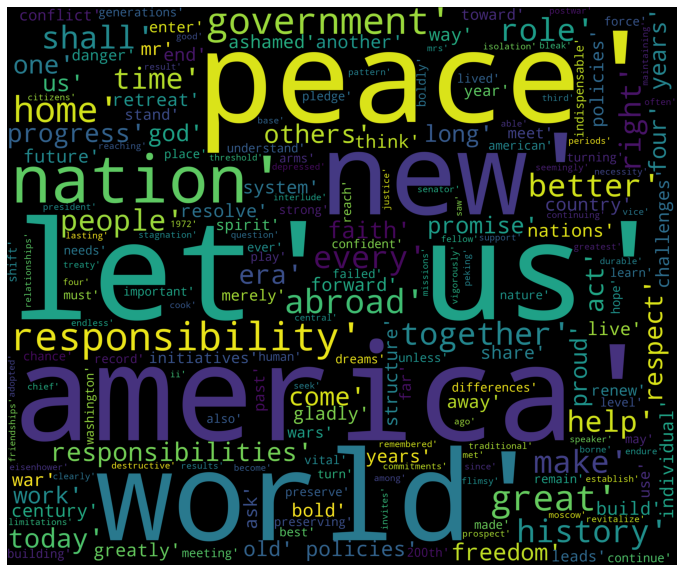

In [343]:
    wordcloud = WordCloud(stopwords=stop,
                          background_color='black',
                          width=3000,
                          height=2500
                         ).generate(str(words_separate_without_sw))

    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()  


In [336]:
    fdist = nltk.FreqDist(words_separate_without_sw) # creates a frequency distribution from a list
    most_common = fdist.max()    # returns a single element
    top_three = list(fdist.keys())[:3] 
    print("The three most frequent words occuring are : ",top_three,"\n\n\n\n")

The three most frequent words occuring are :  ['mr', 'vice', 'president'] 






In [337]:
fdist

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, ...})

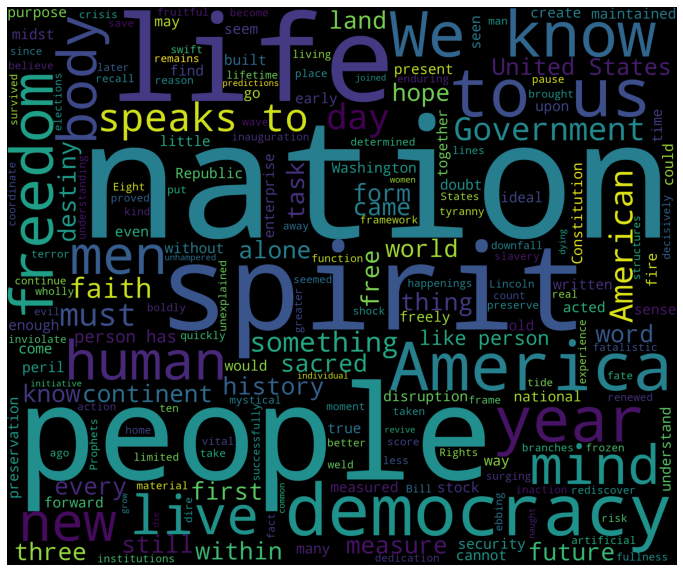

In [312]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS
wordcloud = WordCloud(stopwords=stop,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(roo)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()